In [4]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

# 1 Extracting Scores

In [6]:
import pandas as pd
import ast

# Load the data
road_df = pd.read_csv('../data/road_safety_subclassification.csv')
conf_df = pd.read_csv('../data/conference_subclassification.csv')

# Display the road_df (You can also display conf_df if needed)
display(road_df)

# Subcategories for Road Safety Workshops
road_safety_subcategory_dict = {
    "This road safety workshop is targeted at children or schools, aiming to teach traffic safety and traffic awareness from an early age.": 'Schools',
    "This road safety workshop is designed for cyclists or alternative mobility users to improve their safety awareness and skills on the road.": 'Cyclists',
    "This road safety workshop is directed at automobile drivers to enhance their knowledge of traffic laws and safe driving techniques.": 'Drivers'
}

# Subcategories for Conferences
conference_subcategory_dict = {
    "This conference, workshop, or talk is designed for the general public to discuss mobility issues, raise awareness, and encourage sustainable practices.": 'General Audience',
    "This conference, workshop, or talk is specifically targeted at children or schools, focusing on education and promoting safe and sustainable mobility among younger audiences.": 'Children/Schools',
    "This conference, workshop, or talk is aimed at professionals or policymakers in the mobility sector, discussing regulations, innovations, or infrastructure planning for sustainable mobility.": 'Professionals/Policymakers'
}

# Function to extract scores from secondary_result
def extract_scores(df, subcategory_dict):
    df['secondary_result'] = df['secondary_result'].apply(ast.literal_eval)
    score_columns = {}

    # Loop through each row in the DataFrame to extract labels and scores
    for idx, row in df.iterrows():
        result = row['secondary_result']
        prompts = result['labels']
        scores = result['scores']
        
        # For each label, create a corresponding column in score_columns dict
        for prompt, score in zip(prompts, scores):
            label = subcategory_dict[prompt]
            if label not in score_columns:
                score_columns[label] = [None] * len(df)  # Initialize with None for each row
            score_columns[label][idx] = score  # Assign the score to the appropriate row

    # Convert score_columns dictionary to a DataFrame
    scores_df = pd.DataFrame(score_columns)
    # Concatenate the scores DataFrame with the original DataFrame
    return pd.concat([df, scores_df], axis=1)

# Process Road Safety Workshops
road_df_with_scores = extract_scores(road_df, road_safety_subcategory_dict)
road_df_with_scores.to_csv('../data/road_classification_results.csv', index=False)

# Process Conferences

conf_df_with_scores = extract_scores(conf_df, conference_subcategory_dict)
conf_df_with_scores.to_csv('../data/conference_classification_results.csv', index=False)

display(road_df_with_scores)
display(conf_df_with_scores)


,ID,secondary_result,secondary_classification,secondary_score
0,54,"{'sequence': ""This is an event called 'Activit...",Schools,0.762355
1,65,"{'sequence': ""This is an event called 'Start a...",Schools,0.923011
2,114,"{'sequence': ""This is an event called 'Skill C...",Cyclists,0.533807
3,131,"{'sequence': ""This is an event called 'ROAD ED...",Cyclists,0.911250
4,151,{'sequence': 'This is an event called \'Confer...,Drivers,0.817564
...,...,...,...,...
62,992,"{'sequence': ""This is an event called 'Gimcana...",Drivers,0.424130
63,998,"{'sequence': ""This is an event called 'Activit...",Schools,0.622637
64,1008,"{'sequence': ""This is an event called 'Road Ed...",Cyclists,0.466683
65,1025,"{'sequence': ""This is an event called 'Road sa...",Schools,0.547492


,ID,secondary_result,secondary_classification,secondary_score,Schools,Cyclists,Drivers
0,54,{'sequence': 'This is an event called 'Activit...,Schools,0.762355,0.762355,0.135880,0.101765
1,65,{'sequence': 'This is an event called 'Start a...,Schools,0.923011,0.923011,0.038338,0.038651
2,114,{'sequence': 'This is an event called 'Skill C...,Cyclists,0.533807,0.300495,0.533807,0.165698
3,131,{'sequence': 'This is an event called 'ROAD ED...,Cyclists,0.911250,0.070475,0.911250,0.018275
4,151,{'sequence': 'This is an event called 'Confere...,Drivers,0.817564,0.049131,0.133304,0.817564
...,...,...,...,...,...,...,...
62,992,{'sequence': 'This is an event called 'Gimcana...,Drivers,0.424130,0.233464,0.342405,0.424130
63,998,{'sequence': 'This is an event called 'Activit...,Schools,0.622637,0.622637,0.183583,0.193780
64,1008,{'sequence': 'This is an event called 'Road Ed...,Cyclists,0.466683,0.313292,0.466683,0.220025
65,1025,{'sequence': 'This is an event called 'Road sa...,Schools,0.547492,0.547492,0.448760,0.003747


,ID,secondary_result,secondary_classification,secondary_score,Professionals/Policymakers,General Audience,Children/Schools
0,4,{'sequence': 'This is an event called 'Local P...,Professionals/Policymakers,0.535225,0.535225,0.435599,0.029176
1,15,{'sequence': 'This is an event called 'Framewo...,General Audience,0.619237,0.334638,0.619237,0.046125
2,19,{'sequence': 'This is an event called 'Talk ab...,General Audience,0.856979,0.100913,0.856979,0.042108
3,23,{'sequence': 'This is an event called 'Worksho...,General Audience,0.507635,0.161764,0.507635,0.330601
4,29,{'sequence': 'This is an event called 'Bicycle...,General Audience,0.777809,0.107739,0.777809,0.114453
...,...,...,...,...,...,...,...
231,1030,{'sequence': 'This is an event called 'THE CHA...,General Audience,0.714969,0.238802,0.714969,0.046229
232,1031,{'sequence': 'This is an event called 'Mobilit...,General Audience,0.540271,0.309791,0.540271,0.149938
233,1032,{'sequence': 'This is an event called 'THE CHA...,General Audience,0.711219,0.253423,0.711219,0.035358
234,1033,{'sequence': 'This is an event called 'Mobilit...,General Audience,0.540271,0.309791,0.540271,0.149938


# 2 Manual Classification for Evaluation

In [30]:
import pandas as pd
from ipywidgets import Button, HBox, VBox, Label, Textarea, Checkbox, Output
from IPython.display import display
import nest_asyncio

df = pd.read_csv('../data/activities_tc.csv')

validation_df = pd.read_csv('../data/validation_results.csv')
excluded_ids = validation_df['ID'].unique() 

filtered_df = df[~df['ID'].isin(excluded_ids)]
#sampled_df = filtered_df.groupby('primary_classification').apply(lambda x: x.sample(n=10, random_state=42) if len(x) >= 10 else x)
sampled_df = filtered_df.apply(lambda x: x.sample(n=50, random_state=42) if len(x) >= 10 else x)
sampled_df = sampled_df.reset_index(drop=True)


output = Output() # Create an Output widget to capture print statements

categories = ['Cycling Event', 'Walking Tour', 'Road Safety Workshop', 'Car-Free Day', 'Parking Day', 'Exhibition', 'Infrastructure Inauguration','Conference']
checkboxes = [Checkbox(description=category) for category in categories]
label_name = Label(value="")
text_area_description = Textarea(value="", layout={'width': '1100px', 'height': '100px'}, disabled=True)

tagged_events = []
current_activity_index = 0  # Index for current activity

def update_activity():
    global current_activity_index
    if current_activity_index < len(sampled_df):
        row = sampled_df.iloc[current_activity_index]
        event_id = row['ID']
        name = row['activity_name']
        description = row['activity_description']
        initial_class = row['primary_classification']
        
        # Update the label, description and checkboxes
        label_name.value = f"Annotate (ID: {event_id}): {name} [{initial_class}]"
        text_area_description.value = description
        for checkbox in checkboxes:
            checkbox.value = False
    else:
        label_name.value = "All events tagged!"
        text_area_description.value = ""
        submit_button.disabled = True  # Disable the button after tagging all events

# Function to handle submit button click
def on_submit(button):
    global current_activity_index
    selected_labels = [c.description for c in checkboxes if c.value]
    event_id = sampled_df.iloc[current_activity_index]['ID']
    tagged_events.append((event_id, selected_labels)) 
    
    current_activity_index += 1
    update_activity()  

# Create a submit button
submit_button = Button(description="Submit") #Initialize button
submit_button.on_click(on_submit) #When clicked updates activity

update_activity() #Initialize for first activity
display(VBox([label_name, text_area_description, VBox(checkboxes), submit_button, output]))

# This block is necessary to allow asyncio to work with Jupyter notebooks
nest_asyncio.apply()




In [33]:
classification_results = pd.DataFrame(columns=['ID'] + categories)

for event_id, labels in tagged_events:
    row = {'ID': event_id}
    for category in categories:
        row[category] = category in labels
    classification_results = pd.concat([classification_results, pd.DataFrame([row])], ignore_index=True)


existing_results=pd.read_csv('../data/validation_results.csv')
combined_results = pd.concat([existing_results, classification_results], ignore_index=True)
combined_results.to_csv('../data/validation_results.csv', index=False)

In [34]:

validation_df = pd.read_csv('../data/validation_results.csv')
display(validation_df)

,Unnamed: 0,ID,Cycling Event,Walking Tour,Road Safety Workshop,Car-Free Day,Parking Day,Exhibition,Infrastructure Inauguration,Conference
0,0.0,3,False,False,False,True,False,False,False,False
1,1.0,126,False,False,False,True,False,False,False,False
2,2.0,614,False,True,False,True,False,False,False,False
3,3.0,309,True,False,True,True,False,False,False,False
4,4.0,374,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
241,NaN,100,False,False,False,False,False,True,False,False
242,NaN,81,False,False,False,False,False,False,False,False
243,NaN,413,True,False,False,False,False,False,False,False
244,NaN,249,False,True,False,False,False,False,False,False


# 4 Threshold Selection

,Unnamed: 0_predicted,ID,Infrastructure Inauguration_predicted,Walking Tour_predicted,Exhibition_predicted,Conference_predicted,Car-Free Day_predicted,Cycling Event_predicted,Road Safety Workshop_predicted,Parking Day_predicted,Unnamed: 0_true,Cycling Event_true,Walking Tour_true,Road Safety Workshop_true,Car-Free Day_true,Parking Day_true,Exhibition_true,Infrastructure Inauguration_true,Conference_true
0,0,0,0.412017,0.281301,0.178624,0.081947,0.018968,0.011018,0.008744,0.007381,40.0,False,False,False,False,False,False,True,False
1,3,3,0.008086,0.002312,0.005368,0.003086,0.971631,0.004496,0.002844,0.002177,0.0,False,False,False,True,False,False,False,False
2,9,9,0.752078,0.010666,0.084172,0.051473,0.032972,0.043064,0.016153,0.009422,43.0,False,False,False,False,False,False,True,False
3,16,16,0.394972,0.014266,0.320646,0.244394,0.009971,0.004073,0.008397,0.003280,NaN,False,False,False,False,False,False,True,False
4,22,22,0.436730,0.265194,0.072184,0.053630,0.083340,0.043450,0.032644,0.012826,48.0,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1025,1025,0.029243,0.030951,0.121457,0.204696,0.036292,0.077895,0.478840,0.020626,59.0,False,False,True,False,False,False,False,False
242,1026,1026,0.021446,0.013145,0.035600,0.218009,0.014730,0.022189,0.667110,0.007771,NaN,False,False,True,False,False,False,False,False
243,1033,1033,0.029137,0.057967,0.106426,0.626551,0.013207,0.024015,0.133881,0.008816,NaN,False,False,False,False,False,False,False,True
244,1033,1033,0.029137,0.057967,0.106426,0.626551,0.013207,0.024015,0.133881,0.008816,NaN,False,False,False,False,False,False,False,True


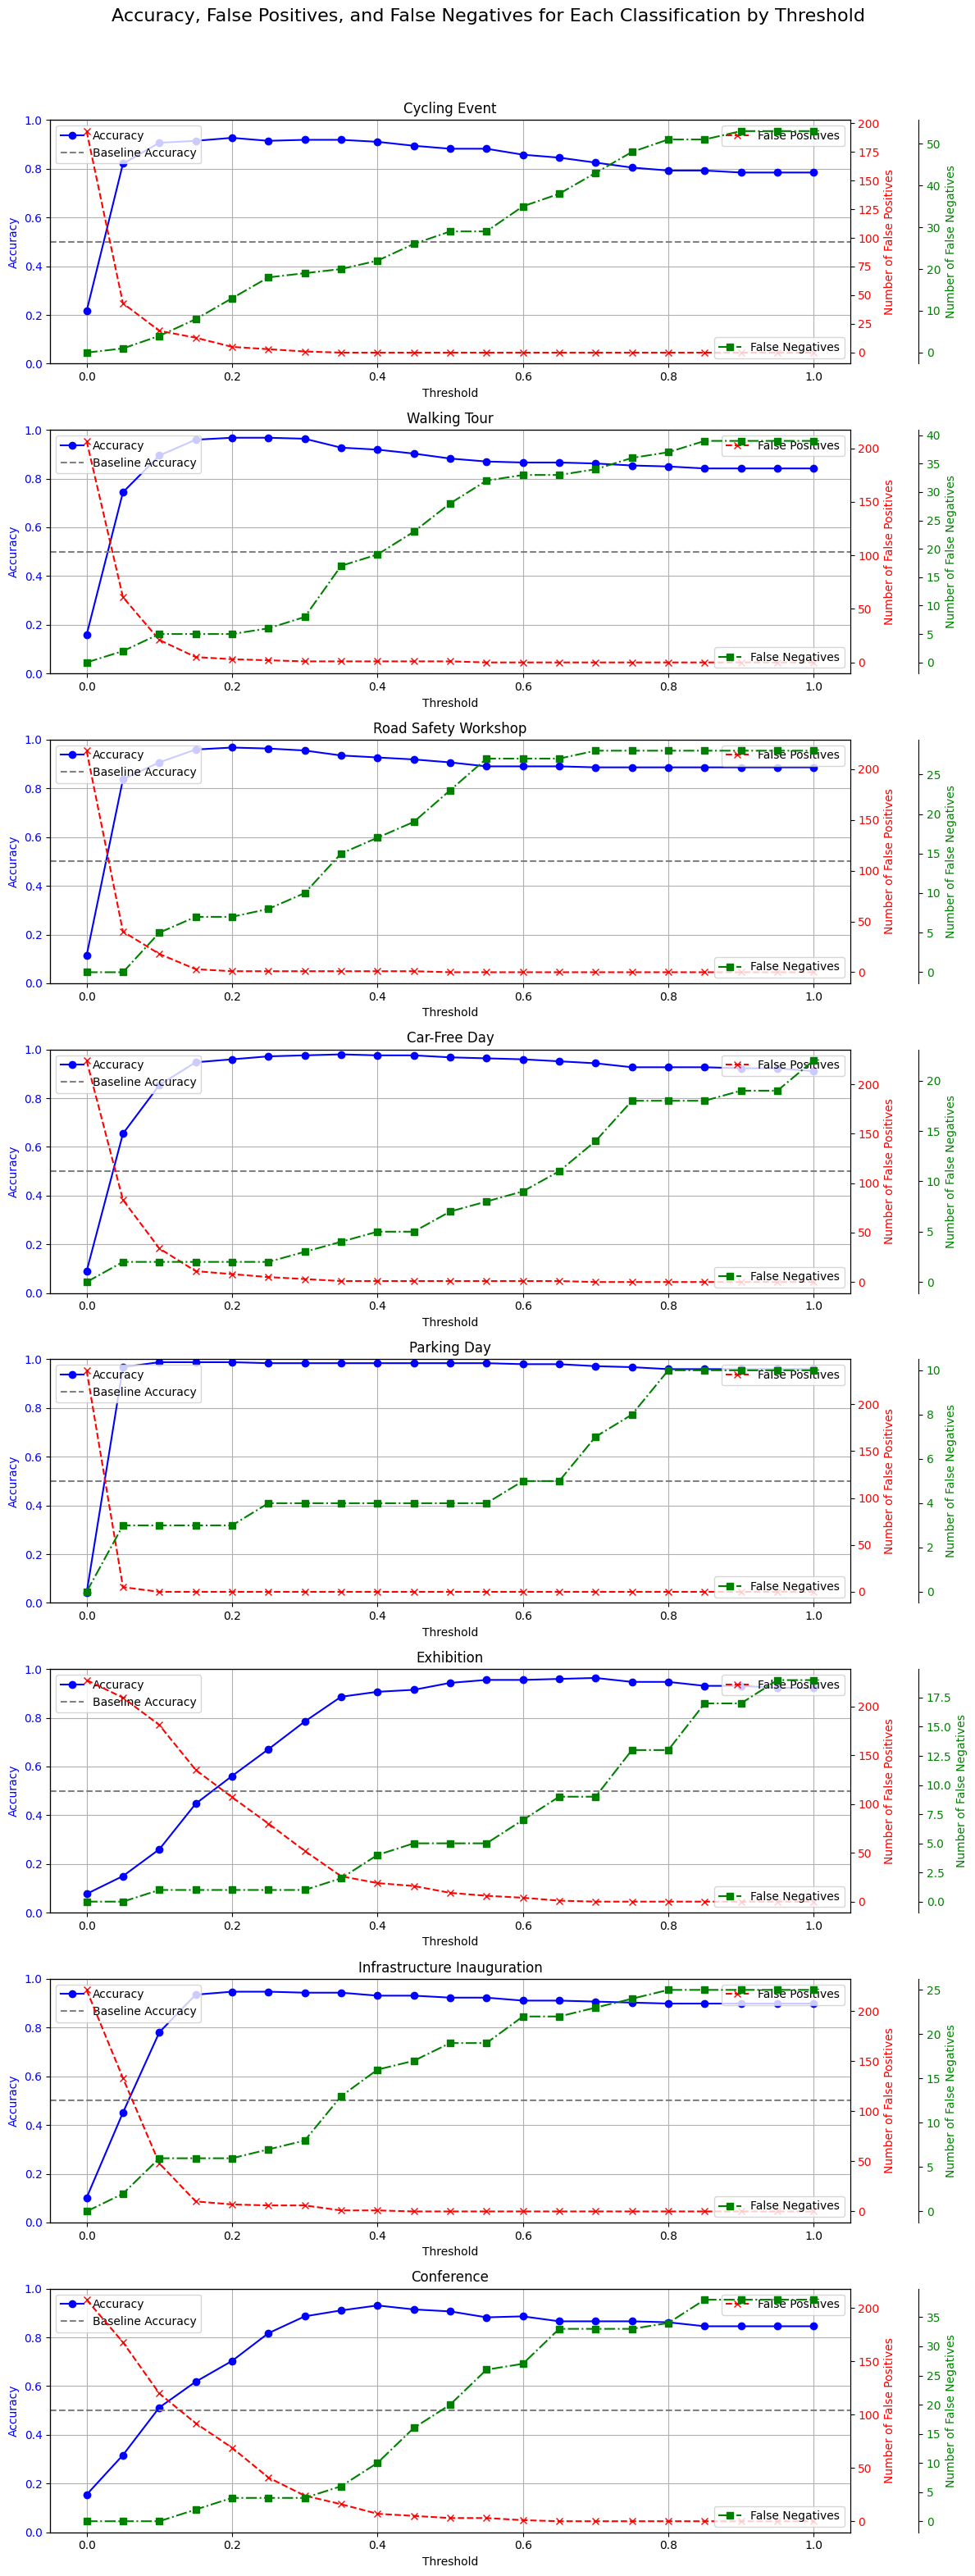

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Categories to analyze
categories = [
    'Cycling Event', 
    'Walking Tour', 
    'Road Safety Workshop', 
    'Car-Free Day', 
    'Parking Day', 
    'Exhibition', 
    'Infrastructure Inauguration',
    'Conference'
]

# Load the predicted and validation DataFrames
predicted_df = pd.read_csv('../data/classification_results.csv')
validation_df = pd.read_csv('../data/validation_results.csv')

# Merge DataFrames on ID
merged_df = pd.merge(predicted_df, validation_df, on='ID', suffixes=('_predicted', '_true'))
display(merged_df)
# Calculate accuracy, false positives, and false negatives for different thresholds
thresholds = np.linspace(0, 1, 21)  # Thresholds from 0 to 1 in increments of 0.1

# Initialize a dictionary to hold accuracies, false positives, and false negatives for each category
results = {category: {'accuracies': [], 'false_positives': [], 'false_negatives': []} for category in categories}

for threshold in thresholds:
    for category in categories:
        # Make predictions based on the current threshold
        predictions = (merged_df[f'{category}_predicted'] >= threshold).astype(int)
        
        # Calculate accuracy
        accuracy = (predictions == merged_df[f'{category}_true']).mean()
        results[category]['accuracies'].append(accuracy)
        
        # Calculate false positives
        fp = ((predictions == 1) & (merged_df[f'{category}_true'] == 0)).sum()
        results[category]['false_positives'].append(fp)
        
        # Calculate false negatives
        fn = ((predictions == 0) & (merged_df[f'{category}_true'] == 1)).sum()
        results[category]['false_negatives'].append(fn)

# Create subplots
fig, axs = plt.subplots(len(categories), 1, figsize=(12, 4 * len(categories)))
fig.suptitle('Accuracy, False Positives, and False Negatives for Each Classification by Threshold', fontsize=16)

# Plot accuracy, false positives, and false negatives for each category on the same plot
for idx, category in enumerate(categories):
    ax1 = axs[idx]
    
    # Plot accuracy
    ax1.plot(thresholds, results[category]['accuracies'], marker='o', color='b', label='Accuracy')
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Accuracy', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    ax1.set_ylim(0, 1)
    
    # Create a second y-axis to plot false positives
    ax2 = ax1.twinx()  
    ax2.plot(thresholds, results[category]['false_positives'], marker='x', color='r', linestyle='--', label='False Positives')
    ax2.set_ylabel('Number of False Positives', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Create a third y-axis to plot false negatives (ax3 is created by using a new twin)
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis
    ax3.plot(thresholds, results[category]['false_negatives'], marker='s', color='g', linestyle='-.', label='False Negatives')
    ax3.set_ylabel('Number of False Negatives', color='g')
    ax3.tick_params(axis='y', labelcolor='g')

    # Add titles and grid
    ax1.set_title(f'{category}')
    ax1.grid()
    ax1.axhline(y=0.5, color='gray', linestyle='--', label='Baseline Accuracy')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax3.legend(loc='lower right')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main tit


# 5 Validation Results

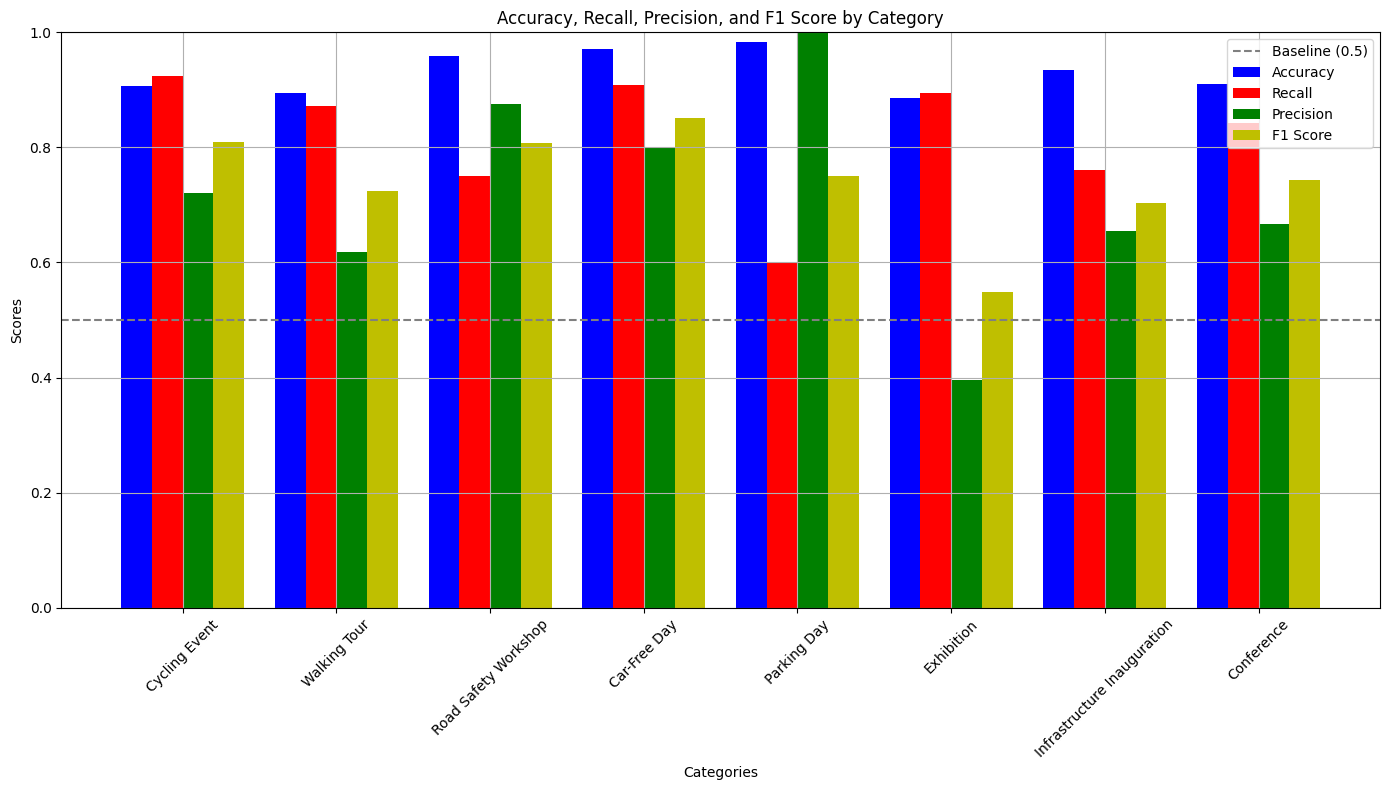

Cycling Event - Accuracy: 0.91, Recall: 0.92, Precision: 0.72, F1 Score: 0.81
Walking Tour - Accuracy: 0.89, Recall: 0.87, Precision: 0.62, F1 Score: 0.72
Road Safety Workshop - Accuracy: 0.96, Recall: 0.75, Precision: 0.88, F1 Score: 0.81
Car-Free Day - Accuracy: 0.97, Recall: 0.91, Precision: 0.80, F1 Score: 0.85
Parking Day - Accuracy: 0.98, Recall: 0.60, Precision: 1.00, F1 Score: 0.75
Exhibition - Accuracy: 0.89, Recall: 0.89, Precision: 0.40, F1 Score: 0.55
Infrastructure Inauguration - Accuracy: 0.93, Recall: 0.76, Precision: 0.66, F1 Score: 0.70
Conference - Accuracy: 0.91, Recall: 0.84, Precision: 0.67, F1 Score: 0.74


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the classification results and validation results
classification_df = pd.read_csv('../data/classification_results.csv').drop(['Unnamed: 0'], axis=1)
validation_df = pd.read_csv('../data/validation_results.csv').drop(['Unnamed: 0'], axis=1)

# Step 2: Set the thresholds in a dictionary
thresholds = {
    'Cycling Event': 0.1,
    'Walking Tour': 0.1,
    'Road Safety Workshop': 0.15,
    'Car-Free Day': 0.25,
    'Parking Day': 0.5,
    'Exhibition': 0.35,
    'Infrastructure Inauguration': 0.15,
    'Conference': 0.35
}

# Step 3: Prepare to calculate total accuracy, recall, precision, and F1 score based on thresholds
metrics = {category: {'accuracy': 0, 'recall': 0, 'precision': 0, 'f1': 0} for category in thresholds.keys()}

# Merge the classification results with the validation DataFrame
merged_df = pd.merge(classification_df, validation_df, on='ID', suffixes=('_predicted', '_true'))

# Step 4: Calculate metrics for each threshold
for category, threshold in thresholds.items():
    # Create a predicted label based on the threshold
    merged_df[f'{category}_predicted'] = (merged_df[f'{category}_predicted'] >= threshold).astype(int)

    # Calculate True Positives, False Positives, True Negatives, and False Negatives
    tp = ((merged_df[f'{category}_predicted'] == 1) & (merged_df[f'{category}_true'] == 1)).sum()
    fp = ((merged_df[f'{category}_predicted'] == 1) & (merged_df[f'{category}_true'] == 0)).sum()
    tn = ((merged_df[f'{category}_predicted'] == 0) & (merged_df[f'{category}_true'] == 0)).sum()
    fn = ((merged_df[f'{category}_predicted'] == 0) & (merged_df[f'{category}_true'] == 1)).sum()

    # Calculate accuracy
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    metrics[category]['accuracy'] = accuracy

    # Calculate recall
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    metrics[category]['recall'] = recall

    # Calculate precision
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    metrics[category]['precision'] = precision

    # Calculate F1 score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    metrics[category]['f1'] = f1

# Step 5: Prepare data for plotting
categories = list(metrics.keys())
accuracy_values = [metrics[category]['accuracy'] for category in categories]
recall_values = [metrics[category]['recall'] for category in categories]
precision_values = [metrics[category]['precision'] for category in categories]
f1_values = [metrics[category]['f1'] for category in categories]

# Step 6: Plot accuracy, recall, precision, and F1 score as bar plots
bar_width = 0.2
x = range(len(categories))

plt.figure(figsize=(14, 8))
bar1 = plt.bar(x, accuracy_values, width=bar_width, label='Accuracy', color='b', align='center')
bar2 = plt.bar([p + bar_width for p in x], recall_values, width=bar_width, label='Recall', color='r', align='center')
bar3 = plt.bar([p + bar_width * 2 for p in x], precision_values, width=bar_width, label='Precision', color='g', align='center')
bar4 = plt.bar([p + bar_width * 3 for p in x], f1_values, width=bar_width, label='F1 Score', color='y', align='center')

plt.xlabel('Categories')
plt.ylabel('Scores')
plt.title('Accuracy, Recall, Precision, and F1 Score by Category')
plt.xticks([p + bar_width * 1.5 for p in x], categories, rotation=45)
plt.ylim(0, 1)
plt.axhline(y=0.5, color='gray', linestyle='--', label='Baseline (0.5)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Optionally display metrics for reference
for category in categories:
    print(f'{category} - Accuracy: {metrics[category]["accuracy"]:.2f}, Recall: {metrics[category]["recall"]:.2f}, '
          f'Precision: {metrics[category]["precision"]:.2f}, F1 Score: {metrics[category]["f1"]:.2f}')


In [61]:


# Step 3: Apply thresholds to get predicted labels
predicted_labels = classification_df[['ID']].copy()  # Start with IDs

# Generate predicted labels based on thresholds
for category, threshold in thresholds.items():
    predicted_labels[category] = (classification_df[category] >= threshold).astype(int)

# Step 4: Merge predicted labels with the validation data on ID
merged_df = pd.merge(predicted_labels, validation_df, on='ID', suffixes=('_predicted', '_true'))

# Step 5: Calculate the overall accuracy (correctly predicted labels / total labels)
correct_predictions = 0
total_predictions = 0

# Loop over all categories
for category in thresholds.keys():
    correct_predictions += (merged_df[f'{category}_predicted'] == merged_df[f'{category}_true']).sum()
    total_predictions += len(merged_df)

# Calculate the total accuracy
total_accuracy = correct_predictions / total_predictions

print(f'Total Accuracy: {total_accuracy:.4f}')

Total Accuracy: 0.9309
